### **Contents:**
- Question 1
- Question 2
- Question 3
- Question 4

In [ ]:
from PIL import Image
from IPython.display import display



### **Question 1**

### Explain the mathematical intuition behind the following optimizers used to optimize
### deep neural networks

### 1- stochastic gradient descent(with momentum):

### v{t} = β * v{t-1} +α * ∇J(W)
### W = W- v

### This is the SGD with momentum formula.The idea is near to the moving average formula.In normal SGD we only consider the gradient of the point that we are right now.in with momentum Formula, We consider all the previous steps we've taken so far(note that this is recursive formula)

In [ ]:
img = Image.open('/content/drive/MyDrive/810101526-seyede-marziyeh-mousavi-kani/1_Nb39bHHUWGXqgisr2WcLGQ.gif')

display(img)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/810101526-seyede-marziyeh-mousavi-kani/1_Nb39bHHUWGXqgisr2WcLGQ.gif'

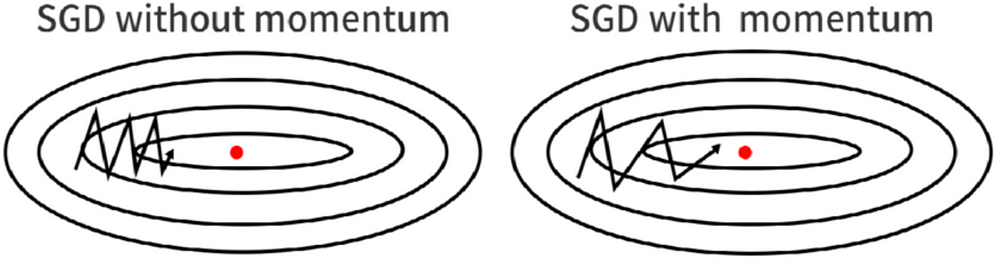

source:https://paperswithcode.com/method/sgd-with-momentum

### B)ADAgrad

s_t = s_{t-1} + g_t^2

x_{t+1} = x_t - (η / sqrt(s_t)) * g_t

### adagrad formula says the if the norm of the gradient of points I've taken so far is high,means that my learning  rate should be low.because if i choose a high learning rate,I may diverge from the main path.in the other hand, It says if the sum of norm of the gradient of all the previous points is low ,it means that i should take bigger steps or else my training will be really slow.



### c)RMSprop:


### E[g^2]_t = b * E[g^2]_{t-1} + (1-b) * g_t^2



### θ_{t+1} = θ_t -( η / (√(E[g^2]_t + ε))) *g_t

### RMSprop is the extenden version of ADAgrad.in RMSprop,we don't pay attention equally to all the points we've seen.the quantiy of paying attention is dependent on coefficient b.


### **Question2**

### A)sgd with momentum:

### advantages:

### Momentum is faster than stochastic gradient descent the training will be faster than SGD.
## Local minima can be an escape and reach global minima due to the momentum involved.
### it always work better than normal SGD.

### disadavantage:

### the disadvantage is that the momentum term can cause the optimization process to oscillate around the global minimum.
### despite not having to manually tune the learning rate there is one huge disadvantage i.e due to monotonically decreasing learning rates, at some point in time step, the model will stop learning as the learning rate is almost close to 0



### B)adagrad:

### The greatest advantage of AdaGrad is that there is no longer a need to manually adjust the learning rate as it adapts itself during training. Nevertheless,

### there is a negative side of AdaGrad:

 ### the learning rate constantly decays with the increase of iterations (the learning rate is always divided by a positive cumulative number). Therefore, the algorithm tends to converge slowly during the last iterations where it becomes very low.


### c)RMSprop:

### adavantages:

### Convergence Speed: RMSProp can converge faster than SGD with momentum, especially in scenarios with noisy or sparse gradients. Stability: The method avoids the diminishing learning rates found in Adagrad, which can stall the training process in the later stages.
### Adaptive Learning Rates: By adjusting the learning rate for each parameter, RMSProp can handle different scales of data and varying curvatures of loss functions.


### disadavntages:


### Not a Silver Bullet: No optimization algorithm, including RMSProp, is guaranteed to work best for all problems. It is always recommended to try different optimizers and compare their performance on the specific task at hand.

###Hyperparameter sensitivity: RMSprop depends on a parameter (β) that can be difficult to set properly, affecting the algorithm's performance.

###Sensitive to learning rate: RMSprop is sensitive to the initial learning rate setting, and choosing the wrong value can cause problems.

###Lack of momentum: Unlike some other optimization methods, RMSprop lacks momentum, which can help the learning process by accumulating past gradients.





### **Question 3**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, callbacks
from sklearn.preprocessing import StandardScaler

### SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.
Page 47, Imbalanced Learning: Foundations, Algorithms, and Applications

### Below are the steps to implement the SMOTE algorithm:

### Draw a random set from the minority class.
### For all the observations for the sample, locate the K-nearest neighbors. To obtain the distance between the neighbors, find the Euclidean distance.
### The next step is to find the vector between the current data point and the selected neighbor.
### Next, multiply a vector between 0 and 1.
### To obtain the new dataset, add new samples to the current data point

### now I want to show how to use SMOTE and its better performance using python and sickit learn in undersampled examples.

### I used make_classification form sickit learn to generate a dataset.as you can see,the dataset in intentionally imbalanced to see how not using SMOTE and using SMOTE affect the results

### flip_y:The fraction of samples whose class is assigned randomly. Larger values introduce noise in the labels and make the classification task harder. Note that the default setting flip_y > 0 might lead to less than n_classes in y in some cases.

### n_redundant:The number of redundant features. These features are generated as random linear combinations of the informative features.

### n_informative:The number of informative features. Each class is composed of a number of gaussian clusters each located around the vertices of a hypercube in a subspace of dimension n_informative. For each cluster, informative features are drawn independently from N(0, 1) and then randomly linearly combined within each cluster in order to add covariance. The clusters are then placed on the vertices of the hypercube.

In [ ]:
from sklearn import  datasets
X, y = datasets.make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=40)

### To show that our dataset is imbalanced i visualized the dataset using matplotlib and np.it uses np.where and first plot the which the label is 0.Then it plots the points which label is 1.np.where() returns the row of the point and I used the coordination of the point to plot it.

Counter({0: 9900, 1: 100})


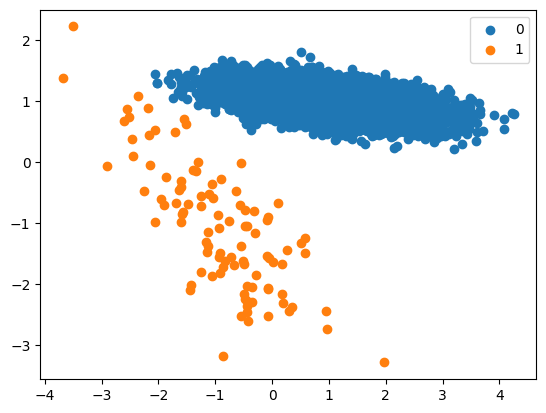

In [ ]:
from collections import Counter
from matplotlib import pyplot
counter = Counter(y)
print(counter)
for label, _ in counter.items():
 row_ix = np.where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### Here I used SMOTE to oversample the class which has small samples

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, y)

### I visaulized the oversampled dataset using the techniques I explained before.

Counter({0: 9900, 1: 9900})


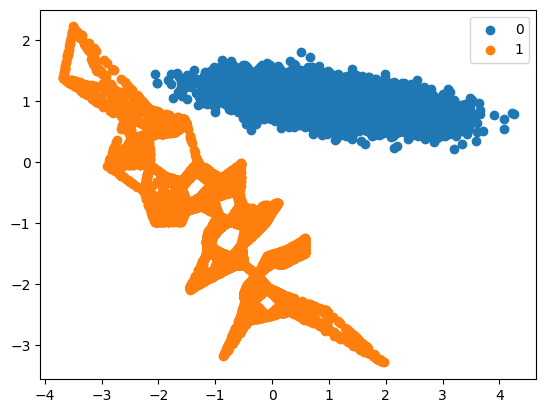

In [ ]:
from collections import Counter
from matplotlib import pyplot
counter = Counter(y_resampled)
print(counter)
for label, _ in counter.items():
 row_ix = np.where(y_resampled == label)[0]
 pyplot.scatter(X_resampled[row_ix, 0], X_resampled[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### This is my method for spliting data.because I wanted to have some unseen data to evaluate model,I divided the dataset into 3 groups instead of two groups.I used sklearn train_test method.I have 10 percent validation,10 percent test and 80 percent training data

In [ ]:
def split_data(X_resampled,y_resampled):
  X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)
  X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.11, random_state=42)
  return  X_train,y_train, X_test,y_test, X_valid,y_valid

### This is my neural network.I used the keras.sequential method.all of my activation functions is relu except in the last layer which is sigmoid function.As you know,sigmoid function is the softmax function for 2 classes.

In [ ]:
def make_model(input_shape):
  model = keras.Sequential([
    layers.Dense(2, activation='relu', input_shape=[input_shape]),
    layers.Dropout(0.1),
    layers.Dense(4, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(4, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
  ])
  return model



In [ ]:
def construct_model(make_model,input_shape):
  model=make_model(input_shape)

  return model


### I split the data.The i built the model.I used SGD to train.my loss function is binary cross entropy because we have binary classifiction.I used accuracy as metrics which here is not good because the data is imbalanced.then I fit the model

In [ ]:
X_train,y_train, X_test,y_test, X_valid,y_valid=split_data(X,y)
input_shape=X_train.shape[1]
model_for_un_smoten=construct_model(make_model,input_shape)
sgd=keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=True,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="SGD",

)
model_for_un_smoten.compile(optimizer=sgd,loss="binary_crossentropy", metrics=['accuracy'], run_eagerly=True)
history =model_for_un_smoten.fit(x=X_train,y=y_train,validation_data=(X_valid,y_valid),epochs=3,batch_size=100,shuffle=True)

Epoch 1/3
81/81 [==============================] - 9s 106ms/step - loss: 0.6025 - accuracy: 0.9935 - val_loss: 0.5245 - val_accuracy: 0.9960
Epoch 2/3
81/81 [==============================] - 4s 42ms/step - loss: 0.4653 - accuracy: 0.9963 - val_loss: 0.4121 - val_accuracy: 0.9920
Epoch 3/3
81/81 [==============================] - 4s 52ms/step - loss: 0.3691 - accuracy: 0.9944 - val_loss: 0.3318 - val_accuracy: 0.9890


i fixed a threshold here and convert the values of the sigmoid function  in the last layer to classes.then I used model.evaluate to calculate loss and accuarcy for the test

In [ ]:

from sklearn.metrics import confusion_matrix
y_pred_probs=model_for_un_smoten.predict(X_test)
y_pred_binary = tf.where(y_pred_probs >=0.5, 1, 0)
test_loss, test_accuracy = model_for_un_smoten.evaluate(X_test,y_test)


31/31 [==============================] - 0s 15ms/step - loss: 0.4286 - accuracy: 0.9970


I used f1 score beacuae the dataset is imbalanced and the model may predict all the samples in one class .so i calculated f1-score here using the numbers i gained in the last cell

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_binary)
print(f"F1 score: {f1:.4f}")

F1 score: 0.6667


i did the same for the smoten data model

In [ ]:
X_train,y_train, X_test,y_test, X_valid,y_valid=split_data(X_resampled,y_resampled)
input_shape=X_resampled.shape[1]
model_for_smoten=construct_model(make_model,input_shape)

model_for_smoten.compile(optimizer="SGD",loss="binary_crossentropy", metrics=['accuracy'], run_eagerly=True)

history =model_for_smoten.fit(x=X_train,y=y_train,epochs=3,batch_size=100,validation_data=(X_valid,y_valid),shuffle=True)

Epoch 1/3
159/159 [==============================] - 12s 67ms/step - loss: 0.3748 - accuracy: 0.9665 - val_loss: 0.3153 - val_accuracy: 0.9848
Epoch 2/3
159/159 [==============================] - 8s 52ms/step - loss: 0.2970 - accuracy: 0.9780 - val_loss: 0.2485 - val_accuracy: 0.9889
Epoch 3/3
159/159 [==============================] - 10s 62ms/step - loss: 0.2411 - accuracy: 0.9828 - val_loss: 0.2020 - val_accuracy: 0.9924


In [ ]:


from sklearn.metrics import confusion_matrix
y_pred_probs=model_for_smoten.predict(X_test)
y_pred_binary = tf.where(y_pred_probs >=0.5, 1, 0)
test_loss, test_accuracy = model_for_smoten.evaluate(X_test,y_test)


62/62 [==============================] - 1s 14ms/step - loss: 0.2003 - accuracy: 0.9918


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_binary)
print(f"F1 score: {f1:.4f}")

F1 score: 0.9919


as you can see the f1 score for the smoten sample is higher.as i said,in this example and in imbalanced dataset,accuracy is not a good metrics to compare.

source:https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

### **Question 4**

I load the dataset using pandas.read_csv and I check 10 last sample to have a view of dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Class notebook/Assignment 1-Dataset.csv')


In [ ]:

dataset.head(-10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F86,F87,F88,F89,F90,F91,F92,Target,Unnamed: 93,Unnamed: 94
0,1,7,2,29,2,6,0,0,0,81,...,0,66,6401,4,21.0,0,2,2,NaN,NaN
1,1,28,0,42,2,4,0,0,0,14,...,36,63,3413,4,15.0,36,1,2,NaN,NaN
2,1,7,0,42,2,4,0,0,0,10,...,36,63,3413,4,15.0,36,1,2,NaN,NaN
3,1,28,0,42,2,4,0,0,0,11,...,36,63,3413,4,15.0,36,1,2,NaN,NaN
4,2,7,0,42,2,6,0,0,0,13,...,36,63,3413,4,15.0,36,1,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111289,1,7,0,53,2,4,0,0,0,3,...,36,63,3454,0,18.0,36,1,2,NaN,NaN
111290,2,7,0,265,2,7,0,0,0,3,...,60,61,1404,0,0.0,60,1,2,NaN,NaN
111291,1,7,0,53,1,4,0,0,0,3,...,36,63,3454,0,18.0,36,1,2,NaN,NaN
111292,2,27,0,118,2,4,0,0,0,3,...,60,61,1404,0,0.0,60,1,2,NaN,NaN


I normalize the feature of the dataset for better prediction

In [ ]:
# Initialize the StandardScaler
def normalize_dataset(dataset):
  scaler = StandardScaler()

  # Fit the scaler to the data
  scaler.fit(dataset)

  # Perform standardization on the DataFrame
  df_standardized = scaler.transform(dataset)

  # Convert the standardized array back to a DataFrame
  dataset = pd.DataFrame(df_standardized, columns=dataset.columns)
  return dataset

Here,I seperated the X_data and the y_data from each other.then i delete the target column from dataframe

In [ ]:
def seperateXy(dataset):
  y_data=dataset.Target
  dataset=dataset.drop(["Target"],axis=1)
  dataset=dataset.dropna(axis='columns')
  x_data=dataset
  return x_data,y_data

SMOTE is a technique for imbalanced datasets.I apply it here and in the future i will chech if my dataset needs SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
def apply_smote(X_data,y_data):
  smote = SMOTE()

# Apply SMOTE to the dataset
  X_resampled, y_resampled = smote.fit_resample(X_data, y_data)
  return X_resampled,y_resampled

This is my neural network model.it has two hidden layers . I used relu activiation for all the layers except the last one which is a softmax activiation function.

I put the X.dimensions as input shape of the network

In [ ]:
def make_model(input_shape):
  model = keras.Sequential([
    layers.Dense(92, activation='relu', input_shape=[input_shape]),
    layers.BatchNormalization(),
     layers.Dropout(0.1),
    layers.Dense(92, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(92, activation='relu'),


    layers.Dense(3, activation='softmax'),
  ])
  return model



This is my test function.I will seperate the data set into 3 groups and i test the model using model.evaluate

In [ ]:
def test_result(X_test,y_test,model):
  test_loss, test_accuracy = model.evaluate(X_test,y_test)
  print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

here is my apply_model.I pass the needed paramateres and build the model then fit it and return in for test and for plottinf confusion matrix

In [ ]:
#optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
def apply_model(make_model,input_shape,loss,metrics,run_eagerly_value,epoch,batch_size,optimizer,X_train,y_train,X_valid,y_valid):
  model=make_model(input_shape)

  model.compile(optimizer=optimizer,loss=loss, metrics=metrics, run_eagerly=True
  )
  history = model.fit(x=X_train,y=y_train,epochs=epoch ,validation_data=(X_valid,y_valid),batch_size=batch_size
   )# put your callbacks in a list))
  return history,model

### in here i pass the model to the function.I get the probablities for each class intead of the label.so i used using np.argmax to  find the class for each one of the samples.then I pass the y_pred to confusion-matrix function of sklearn

In [ ]:
def make_cm(model,X_test,y_test):
  from sklearn.metrics import confusion_matrix
  y_pred_probs=model.predict(X_test)
  y_pred = np.argmax(y_pred_probs, axis=1)
  cm = confusion_matrix(y_test, y_pred)
  return cm

here i used the confusion matrix and make some adjustments and print it.I divided each cell by the sum of the cells in its rows for it to show recall.

In [ ]:

def print_cm(cm,classes):
  import matplotlib.pyplot as plt
  import itertools
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion Matrix")
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  thresh = cm_normalized.max() / 2.0
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm_normalized[i, j], '.2f'),
              horizontalalignment="center",
              color="white" if cm_normalized[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

### Accuracy itself is not enough to evaluate a model.so I used the classifiaction report to see the recal a,precision and f1 score of the model to evaluate my model better.make report function uses the classification report function from slickit learn and returns a dict containing support,f1-score,recall and presicion for each class.I convert it to data frame and visualizing it using matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
def make_report(y_test, y_pred,target_labels):
# Generate the classification report
  y_test=np.argmax(y_test, axis=1)
  y_pred_probs=model.predict(X_test)
  y_pred = np.argmax(y_pred_probs, axis=1)
  report = classification_report(y_test, y_pred, target_names=target_labels, output_dict=True)
  report_df = pd.DataFrame(report).transpose()
  return report_df

def print_report(report_df):
  plt.figure(figsize=(8, 5))
  sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)
  plt.title("Classification Report")
  plt.xlabel("Metrics")
  plt.ylabel("Classes")
  plt.show()

### history is the output of the model.fit.for printing it and seeing the learning curves I convert it to a pandas.dataframe.I used plot function to plot the validation and training loss with different color.i also mentioned the least loss

In [ ]:
def print_loss(history):
  history_df = pd.DataFrame(history.history)
  history_df.loc[:, ['loss', 'val_loss']].plot();
  print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

### I did the same for validiation but instead of printing minimum accuracy I printed max accuracy

In [ ]:
def print_accuracy(history) :

  history_df = pd.DataFrame(history.history)
  history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
  print("maximu validation accuracy: {}".format(history_df['val_accuracy'].max()))

### here, I seperated X and y.I resampled it because the dataset was imbalanced.I used my own function of split_data to split data into 3 groups which is test train and validation. I used train and validation in process of training and I uese test to evaluate model using model.evaluate

In [ ]:
X_data,y_data=seperateXy(dataset)
X_data=normalize_dataset(X_data)
X_resampled,y_resampled=apply_smote(X_data,y_data)
X_train,y_train, X_test,y_test, X_valid,y_valid=split_data(X_resampled,y_resampled)
input_shape=X_train.shape[1]


### I apply the model using adagrad optimizer with learning rate below and.I used 300 epochs to train and my batchisze is 1500.I used sparse categorical cross entropy because I didn't want to use one hot encoding.

In [ ]:


(history_adagrad,model_adagrad)=apply_model(make_model,input_shape,"sparse_categorical_crossentropy",['accuracy'],True,10,1500,tf.keras.optimizers.Adagrad(learning_rate=0.001),X_train,y_train,X_valid,y_valid)

Epoch 1/10
92/92 [==============================] - 13s 125ms/step - loss: 1.1224 - accuracy: 0.4214 - val_loss: 1.0430 - val_accuracy: 0.4705
Epoch 2/10
92/92 [==============================] - 6s 68ms/step - loss: 1.0056 - accuracy: 0.5030 - val_loss: 0.9704 - val_accuracy: 0.5211
Epoch 3/10
92/92 [==============================] - 6s 65ms/step - loss: 0.9553 - accuracy: 0.5333 - val_loss: 0.9264 - val_accuracy: 0.5429
Epoch 4/10
92/92 [==============================] - 5s 52ms/step - loss: 0.9270 - accuracy: 0.5510 - val_loss: 0.8979 - val_accuracy: 0.5595
Epoch 5/10
92/92 [==============================] - 5s 52ms/step - loss: 0.9022 - accuracy: 0.5635 - val_loss: 0.8780 - val_accuracy: 0.5745
Epoch 6/10
92/92 [==============================] - 5s 57ms/step - loss: 0.8869 - accuracy: 0.5723 - val_loss: 0.8623 - val_accuracy: 0.5840
Epoch 7/10
92/92 [==============================] - 6s 61ms/step - loss: 0.8721 - accuracy: 0.5820 - val_loss: 0.8486 - val_accuracy: 0.5919
Epoch 8/10


### here i call test result function which i talked about

In [ ]:
test_result(X_test,y_test,model_adagrad)

532/532 [==============================] - 12s 23ms/step - loss: 0.8103 - accuracy: 0.6159
Test Loss: 0.8103, Test Accuracy: 0.6159


I printed confusion matrix as i explained before

532/532 [==============================] - 5s 9ms/step


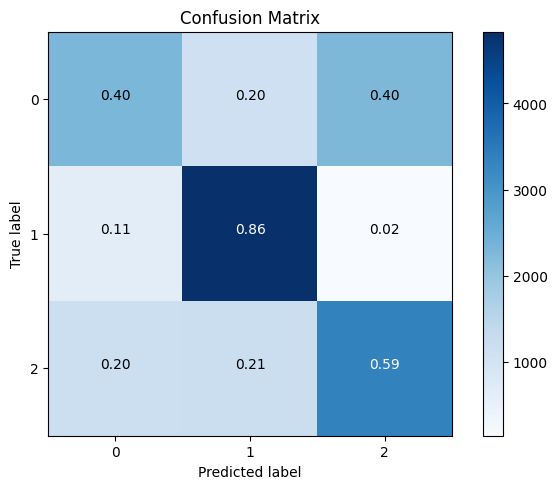

In [ ]:
print_cm(make_cm(model_adagrad,X_test,y_test),[0,1,2])

as you can see the model is pretty good.these values are precision of function and more blue the cell better results!

532/532 [==============================] - 8s 14ms/step


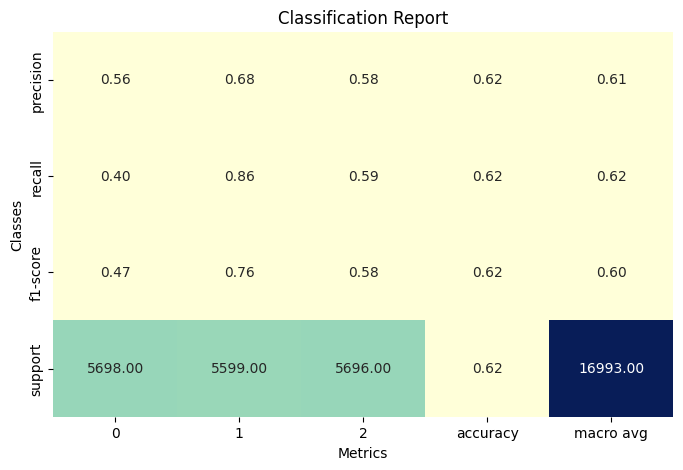

In [ ]:
y_pred_probs=model_adagrad.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print_report(make_report(y_test, y_pred,[0,1,2]))

Minimum validation loss: 0.821707546710968


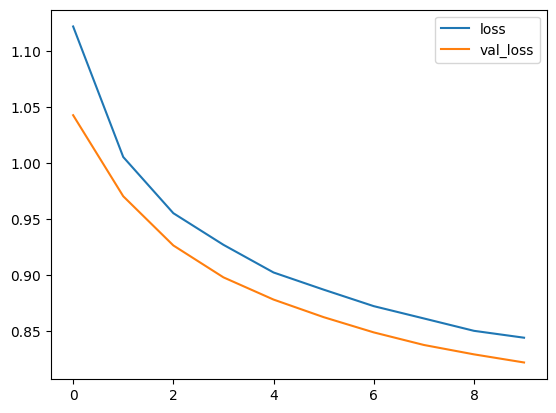

In [ ]:
print_loss(history_adagrad)

maximu validation accuracy: 0.6066767573356628


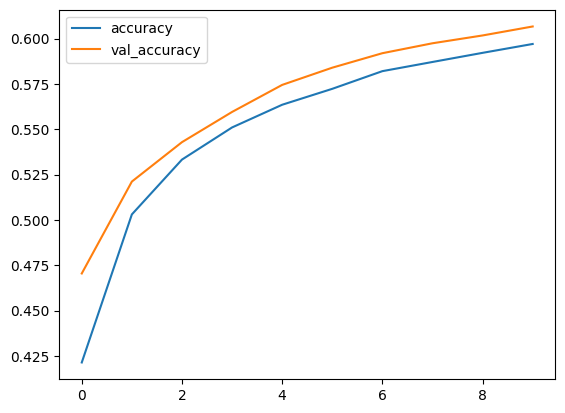

In [ ]:
print_accuracy(history_adagrad)

### I use 0.0001 as learning rate.when I used 0.001 the loss of the training diverges so I figured it may can not find the global minimum because the learning rate is high.after i decreased the learning rate,the loss of training strictly decreased.

In [ ]:
(history_rms_prop,model_rmsprop)=apply_model(make_model,input_shape,"sparse_categorical_crossentropy",['accuracy'],True,3,1500, tf.keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.99),X_train,y_train,X_valid,y_valid)


Epoch 1/3
92/92 [==============================] - 6s 53ms/step - loss: 0.9235 - accuracy: 0.5767 - val_loss: 0.9051 - val_accuracy: 0.6045
Epoch 2/3
92/92 [==============================] - 4s 48ms/step - loss: 0.8106 - accuracy: 0.6198 - val_loss: 0.8050 - val_accuracy: 0.6335
Epoch 3/3
92/92 [==============================] - 5s 59ms/step - loss: 0.7802 - accuracy: 0.6329 - val_loss: 0.7628 - val_accuracy: 0.6451


532/532 [==============================] - 4s 8ms/step


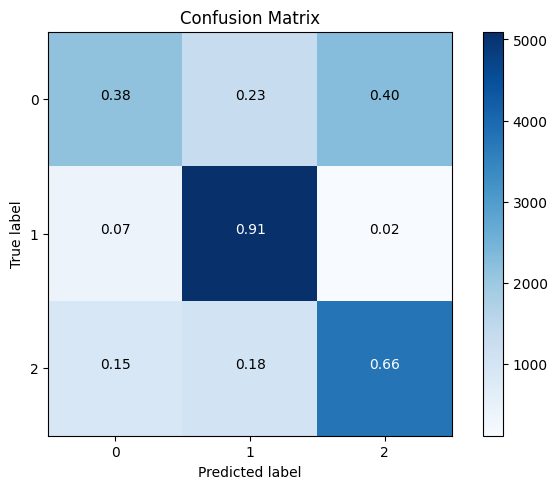

In [ ]:
print_cm(make_cm(model_rmsprop,X_test,y_test),[0,1,2])

532/532 [==============================] - 4s 8ms/step


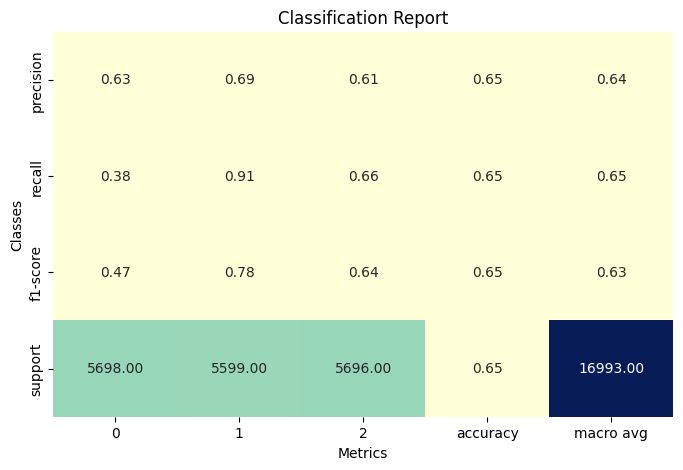

In [ ]:
y_pred_probs=model_rmsprop.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print_report(make_report(y_test, y_pred,[0,1,2]))

Minimum validation loss: 0.7627940773963928


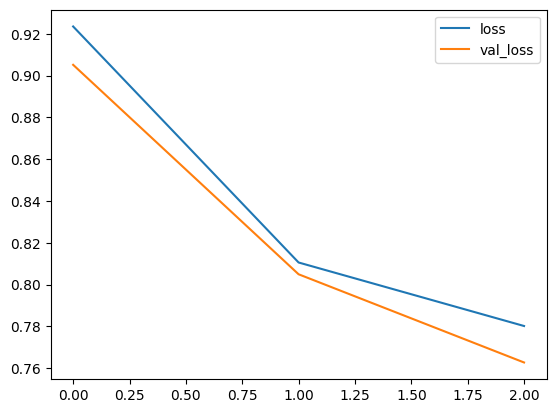

In [ ]:
print_loss(history_rms_prop)

maximu validation accuracy: 0.6451293230056763


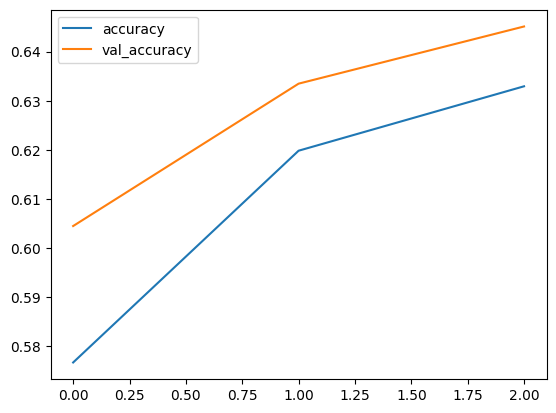

In [ ]:
print_accuracy(history_rms_prop)

as you can see,RMSprop reaches the best accuracy and loss sooner than adagrad .
in contrast,adagrad has less noise and divergence in both accuracy and loss.
both of them performs the best on class 1
at last,the f1 score and the accuracy of rmsprop is better than adagrad.
